##**Iris Flowers Classification ML Project**

Iris is a genus of 260–300 species of flowering plants with showy flowers. Iris is also widely used as a common name for all Iris species, as well as some belonging to other closely related genera. Iris is extensively grown as ornamental plant in home and botanical gardens. The Iris flowers color ranges from white, pink, orange, purple, lavender.

**Date contains following Attributes:**

sepal Length in CM
sepal width in CM
Petal Length In CM
Petal length In CM
**Species:**
Setosa
Versicolour
Virginica

**Importing The Library**

In [38]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


ModuleNotFoundError: ignored

In [13]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
iris.shape

(150, 5)

In [18]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Checking The Missing Value**

In [21]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

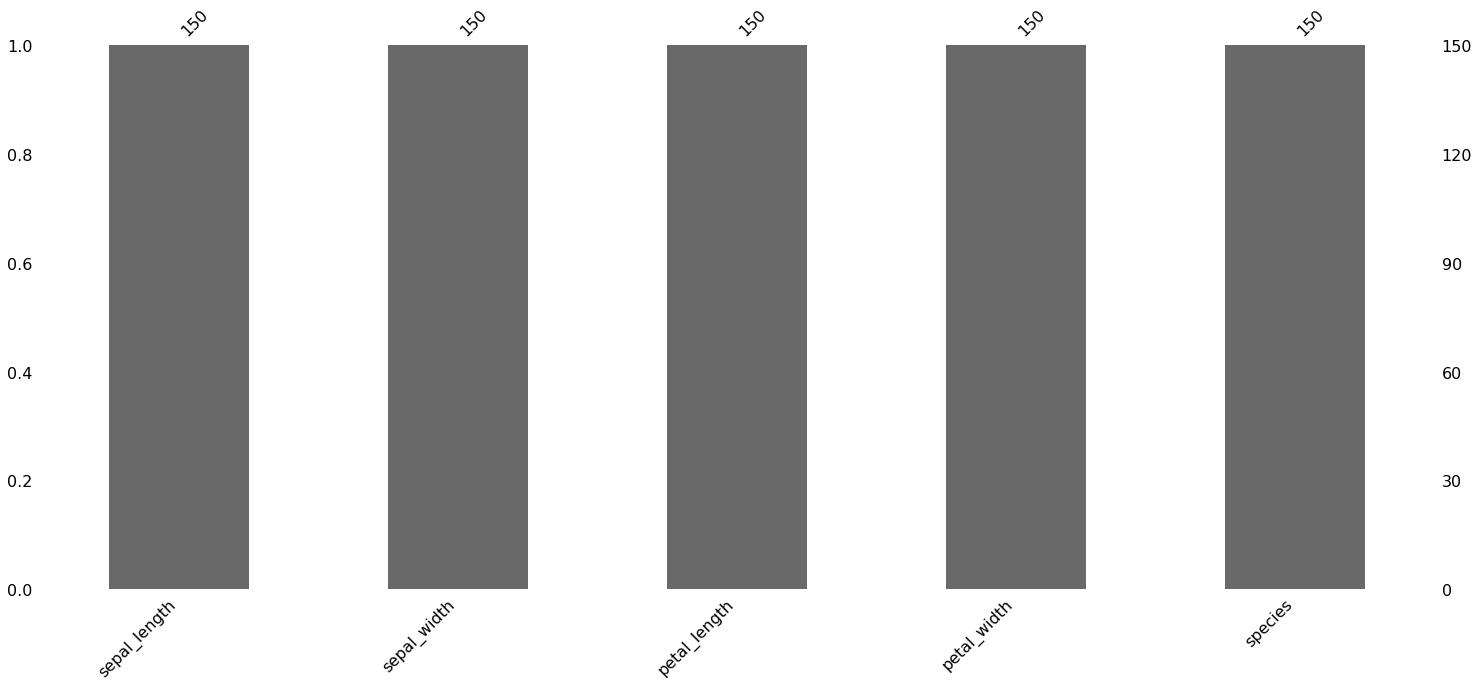

In [24]:
import missingno as msno
msno.bar(iris)
plt.show()

In [25]:
iris.species.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64

In [26]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [27]:
iris.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [28]:
iris.groupby('species').var()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [29]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Data Visualization**

In [32]:
import plotly.express as px
fig = px.pie(iris, values = iris.species.value_counts(),
             title="Pie Chart of Species count",template="none")
fig.show()

**BOX Plot**

In [33]:
fig = px.box(iris, y="sepal_width",color="species",title="Boxplot of Sepal width",template="none")
fig.show()
fig = px.box(iris, y="sepal_length",color="species",title="Boxplot of Sepal length",template="none")
fig.show()
fig = px.box(iris, y="petal_width",color="species",title="Boxplot of Petal width",template="none")
fig.show()
fig = px.box(iris, y="petal_length",color="species",title="Boxplot of Petal length",template="none")
fig.show()

**Correlation heatmap**

In [34]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.target import FeatureCorrelation, BalancedBinningReference, ClassBalance
classes = ["Setosa ","Versicolour" ,"Virginica"]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [42]:
label_encoder = LabelEncoder() 
iris['species']= label_encoder.fit_transform(iris['species']) 
iris['species'].unique()

array([0, 1, 2])

In [43]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Feature Encoding**

In [44]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [45]:
X[:5]
y[:5]

array([0, 0, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



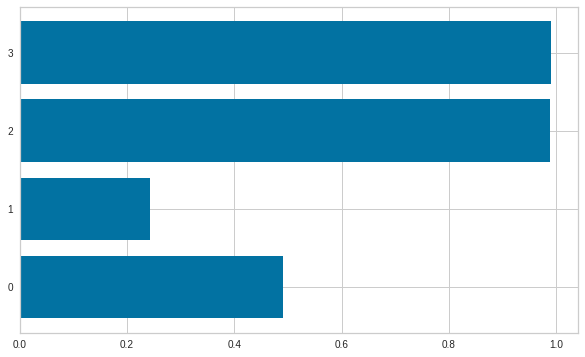

In [47]:
plt.figure(figsize=(10,6))
visualizer = FeatureCorrelation(method='mutual_info-classification')
visualizer.fit(X, y)        
plt.show()

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**K-Nearest Neighbours**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
y_pred = knn_clf.predict(X_test)


Classification Accuracy:

In [52]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667



Classification Error:

In [53]:
print(1 - accuracy_score(y_test, y_pred))

0.033333333333333326


F1- Score

In [55]:
print(f1_score(y_test, y_pred,average="micro"))

0.9666666666666667



**Class Prediction Error**

ROC-Curve

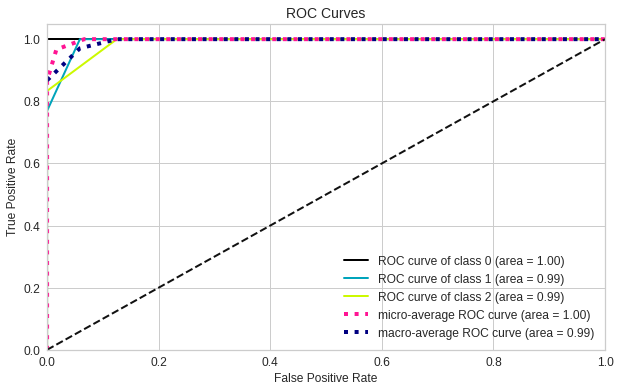

In [65]:
!pip install scikit-plot
import scikitplot as skplt
from yellowbrick.classifier import class_prediction_error
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Confusion matrix**

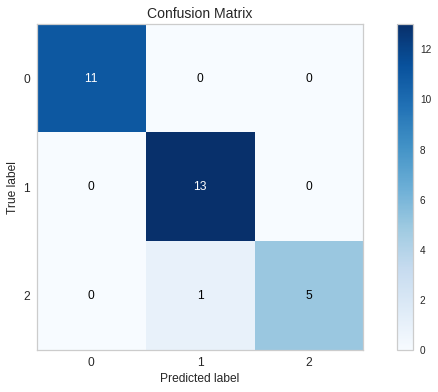

In [66]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(12,6),title_fontsize=14,text_fontsize=12)
plt.show()

Classification report

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

